<a href="https://colab.research.google.com/github/ClovisMallmann/DS_Analise_de_acoes/blob/main/Analise_acoes_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este exercício tem o propósito de ajudar a realizar uma simples análise a partir de um histórico SEMANAL de preços de uma ação e responder algumas perguntas pertinentes. Este será o primeiro de uma série de acordo com outros estudos mais avançados que serão disponibilizados posteriormente.
:)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone


In [ ]:
/content/drive/MyDrive/Colab Notebooks/DS_Analise_de_acoes/PETR4.SA.csv

In [ ]:
historico = pd.read_csv("/content/PETR4.SA.csv", sep=',')

In [ ]:
#Criar novo DataFrame

historico_resumo = historico[['Date','Close']].copy()
historico_resumo.columns = ['Data','Fechamento']

#Convertendo as colunas para os formatos adequados
historico_resumo.convert_dtypes

#Reduzindo os decimais
historico_resumo['Fechamento'] = historico_resumo['Fechamento'].round(2)

#Setando a coluna Data como index.
historico_resumo.last_valid_index()

261

In [ ]:
historico_resumo.head(10)

,Data,Fechamento
0,2019-01-28,25.80
1,2019-02-04,25.13
2,2019-02-11,26.84
3,2019-02-18,27.13
4,2019-02-25,26.70
5,2019-03-04,26.67
6,2019-03-11,28.25
7,2019-03-18,27.00
8,2019-03-25,28.06
9,2019-04-01,28.78


In [ ]:
historico_resumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        262 non-null    object 
 1   Fechamento  262 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


# **1 - Qual o período, em anos, que o estudo abrange ?**

In [ ]:
#Obtendo o ano mais recente e o ano mais antigo.
#Extraindo os 4 primeiros digitos de uma data, p.ex: 2024-01-03, com [:4] resultará somente em "2024".


Ano_final = historico_resumo['Data'].max()[:4]
Ano_inicial = historico_resumo['Data'].min()[:4]


print(f'O estudo abrange {int(Ano_final) - int(Ano_inicial)+1} anos de {Ano_inicial} a {Ano_final}.')



O estudo abrange 6 anos de 2019 a 2024.


# **2 - Preço máximo, mínimo, médio... e as datas quando aconteceram**

In [ ]:
historico_resumo.describe().round(2)

,Fechamento
count,262.00
mean,27.61
std,4.79
min,12.00
25%,24.94
50%,27.42
75%,30.27
max,39.96


In [ ]:
#Usar .loc para procurar a data que corresponda com o valor max/min.
data_preco_max = historico_resumo.loc[historico_resumo['Fechamento'].idxmax(),'Data']
data_preco_min = historico_resumo.loc[historico_resumo['Fechamento'].idxmin(),'Data']

print(f'Na data {data_preco_max} aconteceu o menor preço que é R$ { historico_resumo["Fechamento"].min().round(2)} \n' +
     (f'Na data {data_preco_min} aconteceu o maior preço que é R$ { historico_resumo["Fechamento"].max()} \n' +
     (f'A média de preço é R$ { historico_resumo["Fechamento"].mean().round(2)}')))

Na data 2024-01-22 aconteceu o menor preço que é R$ 12.0 
Na data 2020-03-16 aconteceu o maior preço que é R$ 39.96 
A média de preço é R$ 27.61


# 3 - Um cliente investiu R$130.000 reais comprando ações no dia 05/07/2021 e fez uma operação de venda no dia 06/11/2023. Essa operação resultou em Lucro ou Prejuízo ?
**Obs: Caso tenha lucro, desconte o IR.**

In [ ]:
Capital_investido = 130.000
Imposto_renda = 0.15


#Obtendo os preços nas datas informadas.
valor_compra = historico_resumo.loc[historico_resumo['Data']=='2021-07-05']
valor_venda = historico_resumo.loc[historico_resumo['Data']=='2023-11-06']

#Buscando os valores do índice 0 da coluna 'Fechamento'.
valor_compra = valor_compra['Fechamento'].iloc[0]
valor_venda = valor_venda['Fechamento'].iloc[0]

#Apresentando os valores de compra e venda.
print(f'O valor de compra foi R${valor_compra} e o valor de venda foi R${valor_venda}.')

O valor de compra foi R$27.49 e o valor de venda foi R$34.72.


In [ ]:
#Calculando a quantidade de ações...
Qtde_acoes = (Capital_investido/valor_compra)

#Calculando a diferença de preços
Dif_preços = valor_venda - valor_compra

#Calculando o lucro/prejuizo
Calc = Qtde_acoes*Dif_preços

if Calc > 0:
  calc_ir = (0.15*Calc)
  liquido = Calc - calc_ir
  print(f'Houve um lucro líquido de  R${liquido.round(4)}. Parabéns!')
else:
  print(f'Houve um prejuízo de R${liquido}')


Houve um lucro líquido de  R$29.062. Parabéns!


# **4 - Mostre graficamente este período do investimento.**

In [352]:
#Obtendo os indices das datas informadas.
posicao_inicial = historico_resumo.loc[historico_resumo['Data']=='2021-07-05']
posicao_final = historico_resumo.loc[historico_resumo['Data']=='2023-11-06']

In [360]:
#Criando novo DataFrame copiando o periodo do investimento somente.

historico_investimento = historico_resumo.loc[127:249].copy()

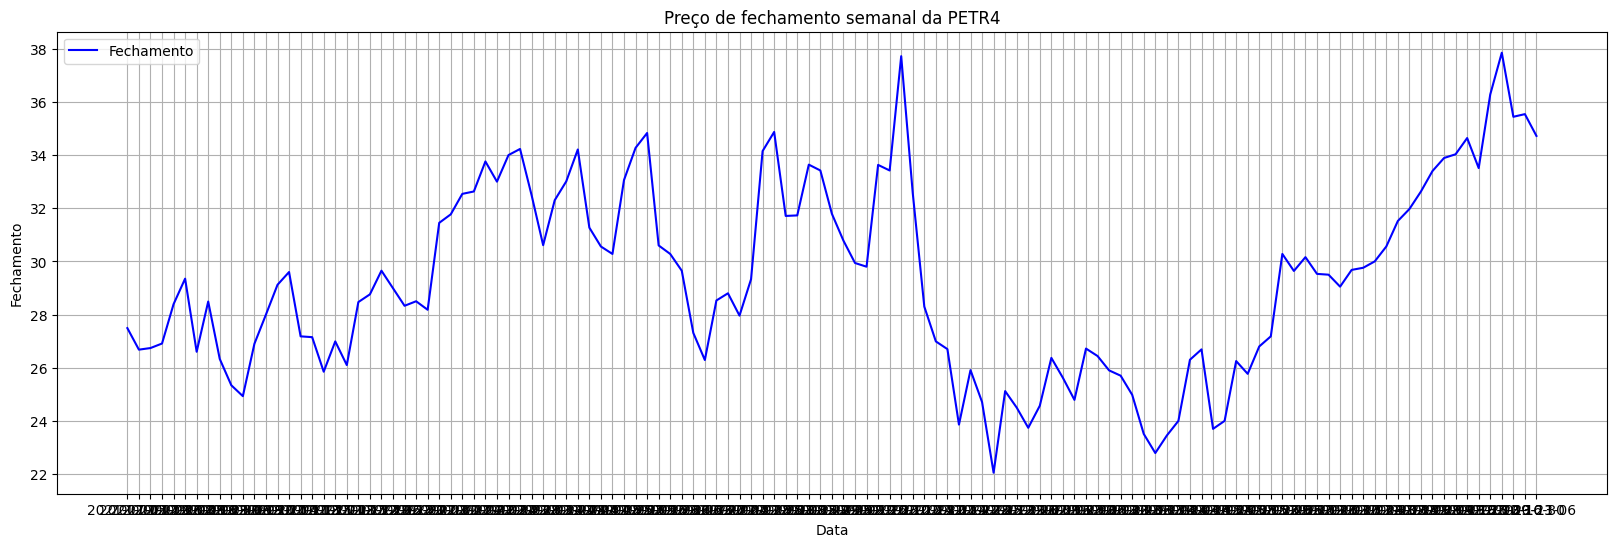

In [361]:
#Criando o grafico
plt.figure(figsize=(20,6))
plt.plot(historico_investimento['Data'], historico_investimento['Fechamento'], label = 'Fechamento', color='blue')
plt.title('Preço de fechamento semanal da PETR4')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend()
plt.grid(True)
plt.show()